# ---------------Omicron Sentiment Analysis-------------------

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import  warnings
warnings.filterwarnings(action='ignore')

import nltk
import re
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score

# Loading Dataset

In [ ]:
df=pd.read_csv('omicron_sentiment_data.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False,Positive
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False,Positive
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False,Positive
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False,Positive
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False,Positive


# Performing Basic Operations

In [ ]:
print("Last 5 rows are:")
df.tail()

Last 5 rows are:


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment
9995,1494341955710439436,Ann Marie Pincivero,Canada,"LOVE my girl ❤️, writing✍️, art🎨, beauty🌺, mus...",2009-03-27 08:56:15,9543,9038,2,False,2022-02-17 16:04:20,"Being called ""Lady of the Mask"" by a troll I b...",NaN,Twitter Web App,0,0,False,Positive
9996,1494341816824451087,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,56,11,818,False,2022-02-17 16:03:47,7 Day Covid Deaths per 1K Population by County...,NaN,smcapplication,1,1,False,Positive
9997,1494341743117942786,ColoradoSPH,Colorado,The accredited Colorado School of Public Healt...,2009-06-05 15:36:53,7307,1305,1941,False,2022-02-17 16:03:29,"More than 12,000 people in CO have died of #CO...",['COVID19'],Hootsuite Inc.,0,1,False,Negative
9998,1494341682082557954,Liz Parrish MBA,NaN,NaN,2012-08-29 18:39:35,4925,93,708,False,2022-02-17 16:03:15,"“The research, published in the journal Nature...",NaN,Hootsuite Inc.,1,9,False,Positive
9999,1494341295006830594,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,56,11,818,False,2022-02-17 16:01:42,7 Day Covid Deaths per 1K Population by County...,NaN,smcapplication,1,1,False,Positive


In [ ]:
print("Random row value:")
df.sample()

Random row value:


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment
6096,1494116088426209285,M. Haytham Matthews,United States of America,"MPH/MSUP, former software professional (Columb...",2014-03-19 02:10:21,449,4005,22642,False,2022-02-17 01:06:49,#Omicron is the most contagious #SARSCoV2 vari...,"['Omicron', 'SARSCoV2']",Twitter Web App,0,1,False,Negative


In [ ]:
print(f"Data Shape:{df.shape}")

Data Shape:(10000, 17)


In [ ]:
print(f"There are {len(df.columns)} in the given dataset and their names are\n{df.columns}" )

There are 17 in the given dataset and their names are
Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'Sentiment'],
      dtype='object')


In [ ]:
df.dtypes  

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
Sentiment           object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10000 non-null  int64 
 1   user_name         10000 non-null  object
 2   user_location     8270 non-null   object
 3   user_description  9377 non-null   object
 4   user_created      10000 non-null  object
 5   user_followers    10000 non-null  int64 
 6   user_friends      10000 non-null  int64 
 7   user_favourites   10000 non-null  int64 
 8   user_verified     10000 non-null  bool  
 9   date              10000 non-null  object
 10  text              10000 non-null  object
 11  hashtags          5403 non-null   object
 12  source            10000 non-null  object
 13  retweets          10000 non-null  int64 
 14  favorites         10000 non-null  int64 
 15  is_retweet        10000 non-null  bool  
 16  Sentiment         10000 non-null  object
dtypes: bool(2), i

In [ ]:
df.describe(include='all')

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Sentiment
count,1.000000e+04,10000,8270,9377,10000,1.000000e+04,10000.000000,10000.000000,10000,10000,10000,5403,10000,10000.000000,10000.000000,10000,10000
unique,NaN,3747,1712,3471,3754,NaN,NaN,NaN,2,9863,9983,2640,135,NaN,NaN,1,2
top,NaN,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,NaN,NaN,NaN,False,2022-02-09 13:00:17,"Very strong evidence, can there be any rebutta...",['Omicron'],Twitter Web App,NaN,NaN,False,Positive
freq,NaN,2429,2443,2429,2429,NaN,NaN,NaN,8946,4,10,903,3749,NaN,NaN,10000,7793
mean,1.493307e+18,NaN,NaN,NaN,NaN,7.334045e+04,2083.287000,14726.762000,NaN,NaN,NaN,NaN,NaN,2.782900,6.824700,NaN,NaN
std,1.207708e+15,NaN,NaN,NaN,NaN,6.159812e+05,9443.040156,46182.157322,NaN,NaN,NaN,NaN,NaN,42.383341,90.358256,NaN,NaN
min,1.491238e+18,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1.491767e+18,NaN,NaN,NaN,NaN,5.600000e+01,11.000000,474.750000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,1.493711e+18,NaN,NaN,NaN,NaN,3.195000e+02,257.000000,818.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN
75%,1.494230e+18,NaN,NaN,NaN,NaN,3.330250e+03,1229.000000,7544.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN


In [ ]:
print(f'There are {len(df)} rows in given dataset ')

There are 10000 rows in given dataset 


# Checking Unique Values

In [ ]:
df.nunique()  

id                  10000
user_name            3747
user_location        1712
user_description     3471
user_created         3754
user_followers       2824
user_friends         2130
user_favourites      3250
user_verified           2
date                 9863
text                 9983
hashtags             2640
source                135
retweets               96
favorites             158
is_retweet              1
Sentiment               2
dtype: int64

In [ ]:
def unique_values(data):
    unique=data.nunique()  
    total=data.count()
    uni=pd.concat([unique,total],axis=1,keys=['Unique','Total'])
    return(uni)

unique_values(df)

,Unique,Total
id,10000,10000
user_name,3747,10000
user_location,1712,8270
user_description,3471,9377
user_created,3754,10000
user_followers,2824,10000
user_friends,2130,10000
user_favourites,3250,10000
user_verified,2,10000
date,9863,10000


# Checking Missing Values

In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       1730
user_description     623
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            4597
source                 0
retweets               0
favorites              0
is_retweet             0
Sentiment              0
dtype: int64

In [ ]:
df.isnull().mean()*100

id                   0.00
user_name            0.00
user_location       17.30
user_description     6.23
user_created         0.00
user_followers       0.00
user_friends         0.00
user_favourites      0.00
user_verified        0.00
date                 0.00
text                 0.00
hashtags            45.97
source               0.00
retweets             0.00
favorites            0.00
is_retweet           0.00
Sentiment            0.00
dtype: float64

In [ ]:
def missing_data(data):
    total=df.isnull().sum()
    percentage=df.isnull().mean()*100
    tt=pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
    return(tt)

missing_data(df)

,Total,Percentage
id,0,0.00
user_name,0,0.00
user_location,1730,17.30
user_description,623,6.23
user_created,0,0.00
user_followers,0,0.00
user_friends,0,0.00
user_favourites,0,0.00
user_verified,0,0.00
date,0,0.00


# Most Frequent Values

In [ ]:
def most_frequent_values(data):
    total=data.count()
    mfv=pd.DataFrame(total)
    mfv.columns=['Total']
    items=[]
    vals=[]
    for col in data.columns:
        item=data[col].value_counts().index[0]
        val=data[col].value_counts().values[0]
      
        items.append(item)
        vals.append(val)
    mfv['Most Frequent Item']=items
    mfv['Frequency']=vals
    mfv['Percentage from total']=np.round(vals/total*100,3)
    
    return(mfv)
    
most_frequent_values(df)

,Total,Most Frequent Item,Frequency,Percentage from total
id,10000,1491840066506743820,1,0.010
user_name,10000,Nathan Joyner,2429,24.290
user_location,8270,"Los Angeles, CA",2443,29.541
user_description,9377,Global Venture Captial and Private Equity/Busi...,2429,25.904
user_created,10000,2015-05-18 20:52:29,2429,24.290
user_followers,10000,56,1290,12.900
user_friends,10000,11,2438,24.380
user_favourites,10000,816,779,7.790
user_verified,10000,False,8946,89.460
date,10000,2022-02-09 13:00:17,4,0.040


# EDA---Exploded Data Analysis

In [ ]:
colm=['Sentiment', 'user_verified','is_retweet','hashtags','source','user_name', 'user_location']
for col in colm:
    print(col)
    print(df[col].unique())
    print('---------------')

Sentiment
['Positive' 'Negative']
---------------
user_verified
[False  True]
---------------
is_retweet
[False]
---------------
hashtags
[nan "['CDC', 'vaccinated', 'Omicron', 'hospital']"
 "['Beijing2022', 'WinterOlympics', 'olympians', 'security']" ...
 "['omicron', 'HerdImmunity']"
 "['pfizer', 'Omicron', 'Vaccine', 'Fraud', 'VaccineSideEffects']"
 "['hindsight', 'Omicron']"]
---------------
source
['smcapplication' 'Twitter Web App' 'Agorapulse app' 'Twitter for iPhone'
 'Twitter for Android' 'Paper.li' 'Hootsuite Inc.' 'LaterMedia' 'Buffer'
 'WordPress.com' 'Sprinklr' 'Echobox' 'Sprout Social' 'Twitter for iPad'
 'TweetDeck' 'The Social Jukebox' 'Twitter for Mac' 'HubSpot' 'Instagram'
 'HeyOrca' 'Salesforce - Social Studio' 'Twitter for Advertisers.'
 'Intelligent Transport' 'News Medical' 'IFTTT' 'dlvr.it'
 'Tweetbot for iΟS' 'AIT News' 'Science X Status Updates' 'La Vie Zine'
 'LinkedIn' 'nertiqatja' 'Twitter Media Studio - LiveCut'
 'Microsoft Power Platform' 'IndiaPost' 'Zoho

In [ ]:
for col in colm:
    print(col)
    print(df[col].value_counts())
    print('----------------')
    print(' ')

Sentiment
Positive    7793
Negative    2207
Name: Sentiment, dtype: int64
----------------
 
user_verified
False    8946
True     1054
Name: user_verified, dtype: int64
----------------
 
is_retweet
False    10000
Name: is_retweet, dtype: int64
----------------
 
hashtags
['Omicron']                            903
['COVID19', 'Omicron']                 213
['omicron']                            190
['COVID19']                            141
['OMICRON']                             77
                                      ... 
['Omicron', 'UNICEF']                    1
['omicron', 'hongkong']                  1
['COVID', 'Japan']                       1
['Covid19', 'Omicron', 'Mauritius']      1
['hindsight', 'Omicron']                 1
Name: hashtags, Length: 2640, dtype: int64
----------------
 
source
Twitter Web App        3749
smcapplication         2429
Twitter for iPhone     1084
Twitter for Android    1070
TweetDeck               363
                       ... 
Raven Tools      

In [ ]:
# percentage of each sentiment

df['Sentiment'].value_counts(normalize=True)

Positive    0.7793
Negative    0.2207
Name: Sentiment, dtype: float64

In [ ]:
# Top 10 user location

df['user_location'].value_counts()[:10]

Los Angeles, CA                 2443
India                            256
United States                    150
USA                              124
Chandigarh                       108
New York City, New York, USA      91
In Your Mind Now                  87
Canada                            86
Hong Kong                         62
Philippines                       62
Name: user_location, dtype: int64

In [ ]:
# Date column contain both date and time
df['date'][1]

'2022-02-10 18:21:06'

In [ ]:
# Minimum Date in Dataset
df['date'].min()[0:10]

'2022-02-09'

In [ ]:
# Maximum Date in Dataset
df['date'].max()[0:10]

'2022-02-19'

In [ ]:
# Minimum Time in Dataset
df['date'].min()[11:]

'02:31:37'

In [ ]:
# Maximum Time in Dataset
df['date'].max()[11:]

'08:12:02'

# Visualization

Text(0.5, 1.0, 'Corelation Heatmap')

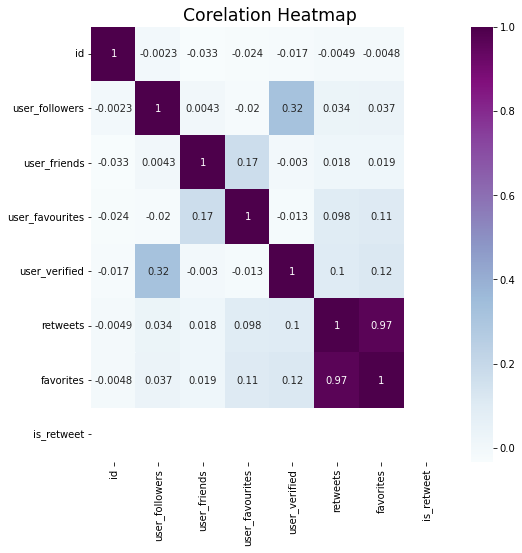

In [ ]:
plt.figure(figsize=(8,8))
_=sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title('Corelation Heatmap',size='xx-large')

Text(0.5, 1.0, 'Null values Heatmap')

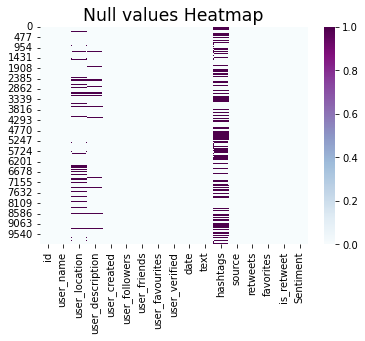

In [ ]:
_=sns.heatmap(df.isna(),cbar=True,cmap="BuPu")
plt.title('Null values Heatmap',size='xx-large')

Text(0.5, 1.0, 'Pie plot of Sentiment column')

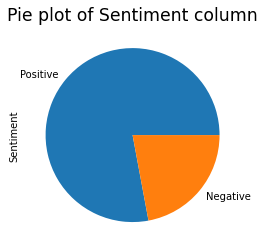

In [ ]:
plt.figure(figsize=(10,4))
df['Sentiment'].value_counts().plot.pie()
plt.title('Pie plot of Sentiment column',size='xx-large')

Text(0.5, 1.0, 'Pie plot of User_Verified column')

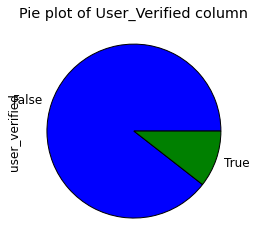

In [ ]:
plt.figure(figsize=(10,4))
plt.style.use('classic')
df['user_verified'].value_counts().plot.pie()
plt.title('Pie plot of User_Verified column')

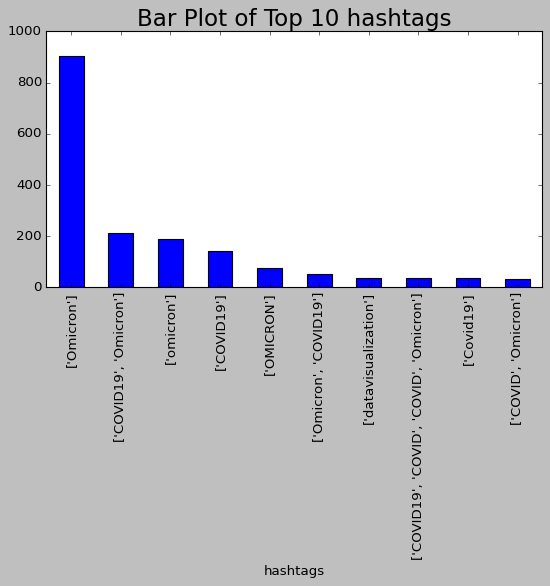

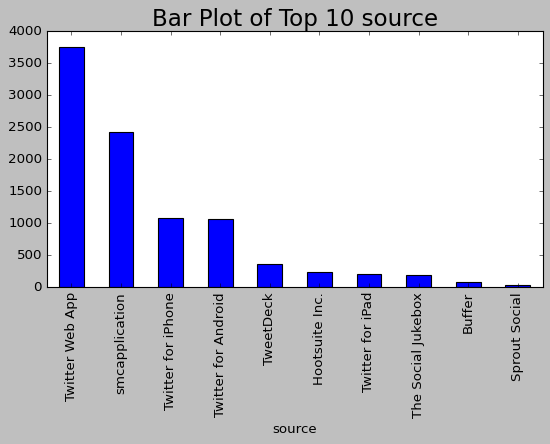

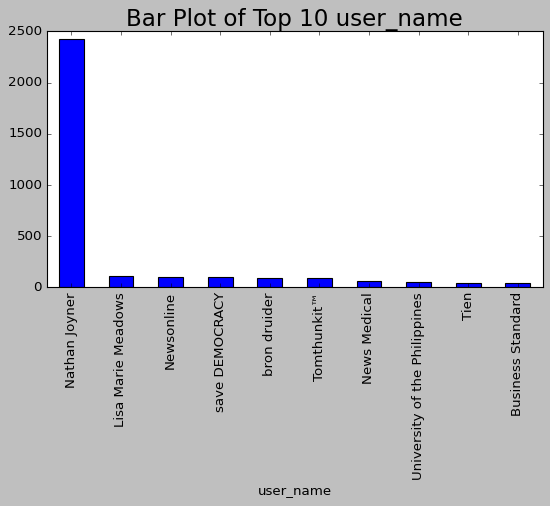

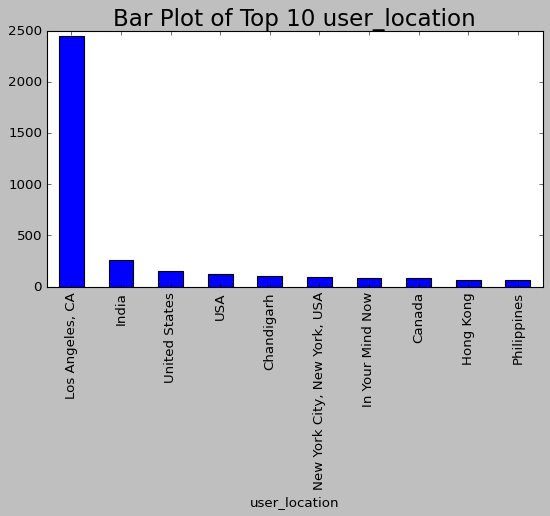

In [ ]:
cols=['hashtags','source','user_name', 'user_location']
for i in cols:
    plt.figure(figsize=(8,4))
    plt.style.use('classic')
    print('\n')
    df[i].value_counts()[:10].plot.bar()
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Bar Plot of Top 10 ' + i,size='xx-large')
    plt.show()
    print('\n')

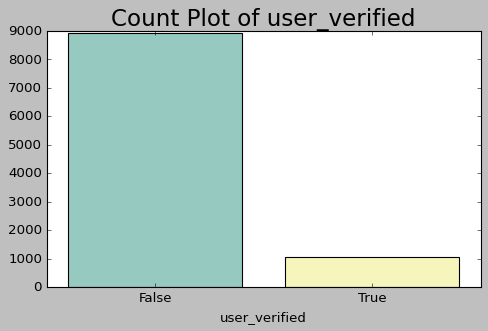

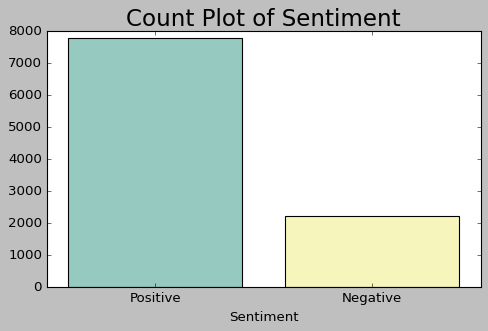

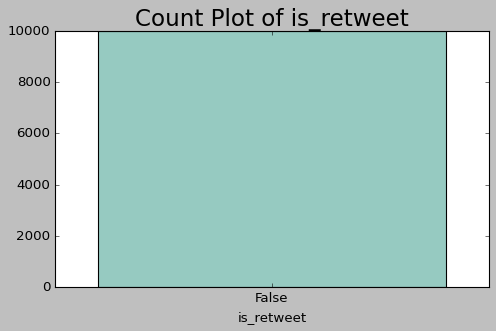

In [ ]:
cat_cols=['user_verified','Sentiment','is_retweet']
for i in cat_cols:
    plt.figure(figsize=(7,4))
    print('\n')
    sns.countplot(df[i],palette='Set3')
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Count Plot of ' + i,size='xx-large')
    plt.show()
    print('\n')

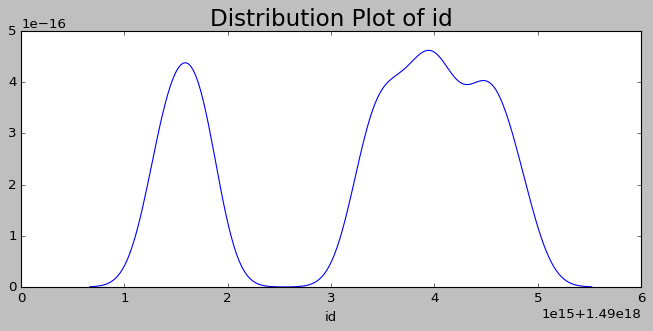

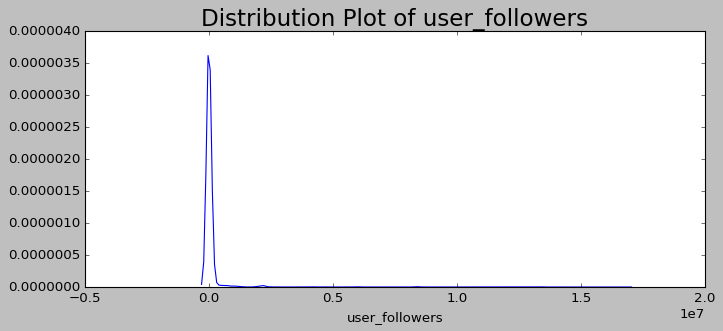

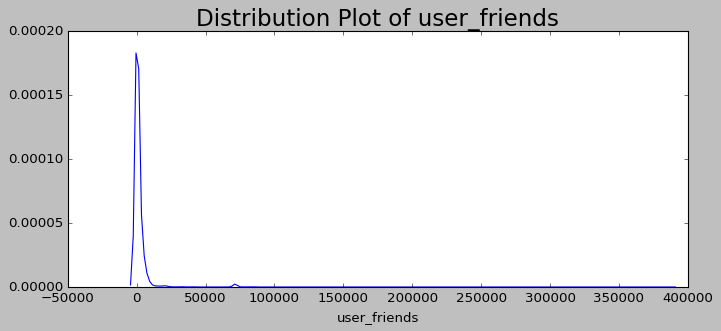

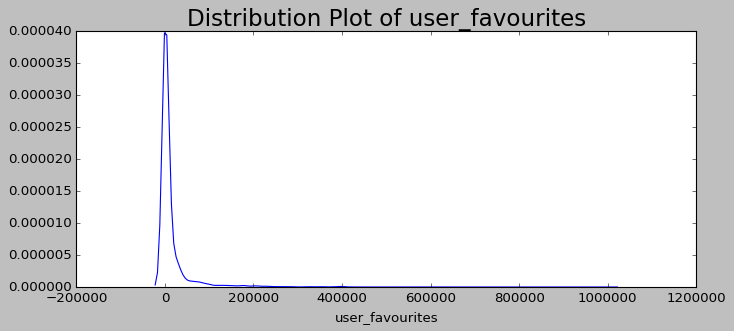

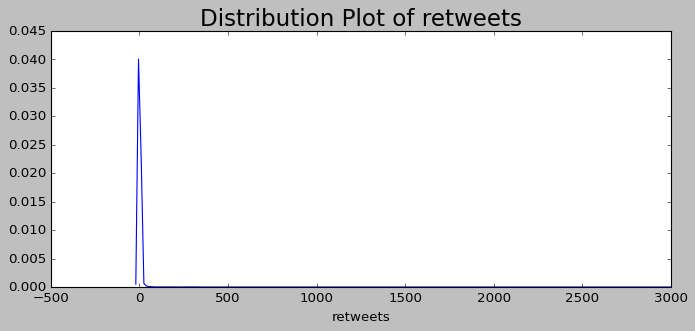

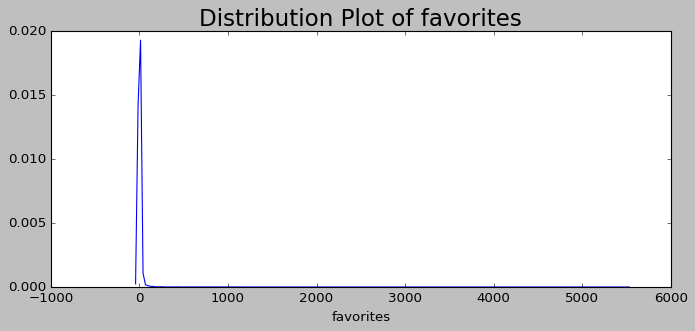

In [ ]:
num_col=['id','user_followers','user_friends','user_favourites','retweets','favorites']
for i in num_col:
    print('\n')
    plt.figure(figsize=(10,4))
    plt.style.use('classic')
    sns.distplot(df[i],hist=False,kde=True,bins=120)
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Distribution Plot of ' + i,size='xx-large')
    plt.show()
    print('\n')

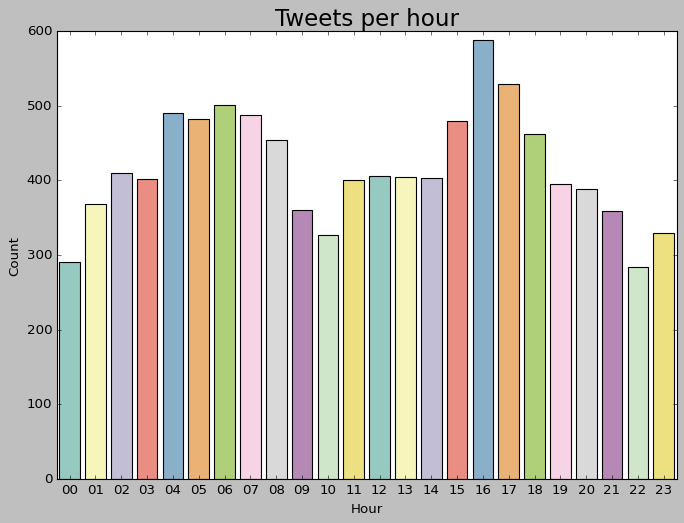

In [ ]:
df['date']=pd.to_datetime(df['date'])
tweets_per_hr=df['date'].dt.strftime('%H').value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['Hour']=tweets_per_hr.index
plt.figure(figsize=(10,7))
sns.barplot(x='Hour',y='Count',data=tweets_per_hr,palette='Set3')
plt.title('Tweets per hour',size='xx-large')
plt.show()

# Handeling Missing Data

In [ ]:
# Fill with most frequent value

df['user_location'].fillna('Los Angeles, CA',inplace =True)
df['user_description'].fillna('Global Venture Captial and Private Equity/Business Development Professional',inplace =True)
df['hashtags'].fillna("['Omicron']",inplace =True)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().mean()*100

id                  0.0
user_name           0.0
user_location       0.0
user_description    0.0
user_created        0.0
user_followers      0.0
user_friends        0.0
user_favourites     0.0
user_verified       0.0
date                0.0
text                0.0
hashtags            0.0
source              0.0
retweets            0.0
favorites           0.0
is_retweet          0.0
Sentiment           0.0
dtype: float64

# Dropping Unwanted Columns

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'Sentiment'],
      dtype='object')

In [ ]:
df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified','date','hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['text', 'Sentiment'], dtype='object')

# Sentiment Predicting Models(NLP)

# Pre-Processing Steps

In [ ]:
wd=WordNetLemmatizer()
corpus=[]
for i in range(len(df)):
    text=re.sub('[^a-zA-Z]',' ',df['text'][i])
    text=re.sub("\s\s+", " ", df['text'][i])
    text = re.sub('https?://\S+|www\.\S+', ' ',df['text'][i])
    text = re.sub('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', '',df['text'][i])
    text = re.sub('@[\w]+', '',df['text'][i])
    df['text']=df['text'].str.replace('READ MORE','')
    df['text']=df['text'].str.replace('https://t.co/','')
    text=text.lower()
    text=text.split()
    text=[wd.lemmatize(word) for word in text if not word in sw.words('english')]
    text=' '.join(text)
    corpus.append(text)

# Count Vectorizer

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [ ]:
x.shape

(10000, 21849)

In [ ]:
y=df['Sentiment'].iloc[:].values

In [ ]:
y.shape

(10000,)

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print('#####################')
print(x_test.shape)
print(y_test.shape)

(8000, 21849)
(8000,)
#####################
(2000, 21849)
(2000,)


# Multinomial Naive Bayes

In [ ]:
# Model Building

model_mnb=MultinomialNB()
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
# Predicting Result

y_prdm= model_mnb.predict(x_test)

In [ ]:
# Accuracy Score checking

accuracy_test = accuracy_score(y_test, y_prdm)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.7635


In [ ]:
print('Training Score:',100*model_mnb.score(x_train,y_train))
print('Testing Score :',100*model_mnb.score(x_test,y_test))

Training Score: 93.425
Testing Score : 76.35


In [ ]:
# Confusion matrix and Classification report

print('Confusion Matrix:\n ' + str(confusion_matrix(y_prdm,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_prdm,y_test)))

Confusion Matrix:
 [[ 307  286]
 [ 187 1220]]
_________________________
Classification Report:
               precision    recall  f1-score   support

    Negative       0.62      0.52      0.56       593
    Positive       0.81      0.87      0.84      1407

    accuracy                           0.76      2000
   macro avg       0.72      0.69      0.70      2000
weighted avg       0.75      0.76      0.76      2000



# Gaussian Naive Bayes

In [ ]:
# Model Building

model_gnb=GaussianNB()
model_gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
# Predicting Result

y_prdg = model_gnb.predict(x_test)

In [ ]:
# Score checking

print('Training Score:',100*model_gnb.score(x_train,y_train))
print('Testing Score :',100*model_gnb.score(x_test,y_test))

Training Score: 99.55000000000001
Testing Score : 53.7


In [ ]:
accuracy_test = accuracy_score(y_test, y_prdg)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.537


In [ ]:
# Confusion matrix and Classification report

print('Confusion Matrix:\n ' + str(confusion_matrix(y_prdg,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_prdg,y_test)))

Confusion Matrix:
 [[340 772]
 [154 734]]
_________________________
Classification Report:
               precision    recall  f1-score   support

    Negative       0.69      0.31      0.42      1112
    Positive       0.49      0.83      0.61       888

    accuracy                           0.54      2000
   macro avg       0.59      0.57      0.52      2000
weighted avg       0.60      0.54      0.51      2000

